In [1]:
import pyspark
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('solution').getOrCreate()
df = spark.read.csv('Salesdataset.csv', header=True, inferSchema=True)
df.show()

+--------+------+------+--------+---------------+----------------+-----------+----------+------------------+----------+-------------+-------------------+
|Order ID|Amount|Profit|Quantity|       Category|    Sub-Category|PaymentMode|Order Date|      CustomerName|     State|         City|         Year-Month|
+--------+------+------+--------+---------------+----------------+-----------+----------+------------------+----------+-------------+-------------------+
| B-26776|  9726|  1275|       5|    Electronics|Electronic Games|        UPI|2023-06-27|     David Padilla|   Florida|        Miami|2023-06-01 00:00:00|
| B-26776|  9726|  1275|       5|    Electronics|Electronic Games|        UPI|2024-12-27|     Connor Morgan|  Illinois|      Chicago|2024-12-01 00:00:00|
| B-26776|  9726|  1275|       5|    Electronics|Electronic Games|        UPI|2021-07-25|      Robert Stone|  New York|      Buffalo|2021-07-01 00:00:00|
| B-26776|  4975|  1330|      14|    Electronics|        Printers|        UP

Calculate statewise avg payment by different payment modesfor each category

In [5]:
from pyspark.sql.functions import avg,round
payment_avg = (df.groupBy("State", "Category", "PaymentMode").agg(round(avg("Amount"),2).alias("Average_Amt")))
payment_avg.show()

+----------+---------------+-----------+-----------+
|     State|       Category|PaymentMode|Average_Amt|
+----------+---------------+-----------+-----------+
|California|Office Supplies|Credit Card|     4524.8|
|California|Office Supplies|        UPI|    4915.06|
|     Texas|Office Supplies| Debit Card|    6036.62|
|  New York|    Electronics|        UPI|     4791.0|
|  New York|      Furniture|        COD|    5166.67|
|  New York|Office Supplies|        COD|    6130.08|
|      Ohio|Office Supplies|Credit Card|    5090.07|
|   Florida|Office Supplies|Credit Card|    4731.91|
|California|    Electronics|        EMI|     6169.0|
|  New York|Office Supplies|Credit Card|    3817.63|
|  New York|    Electronics|        EMI|    5207.82|
|  New York|Office Supplies|        UPI|    6370.65|
|  New York|      Furniture|        EMI|    4959.77|
|     Texas|    Electronics|        EMI|    5002.68|
|   Florida|    Electronics| Debit Card|     6583.3|
|  Illinois|    Electronics|        EMI|     5

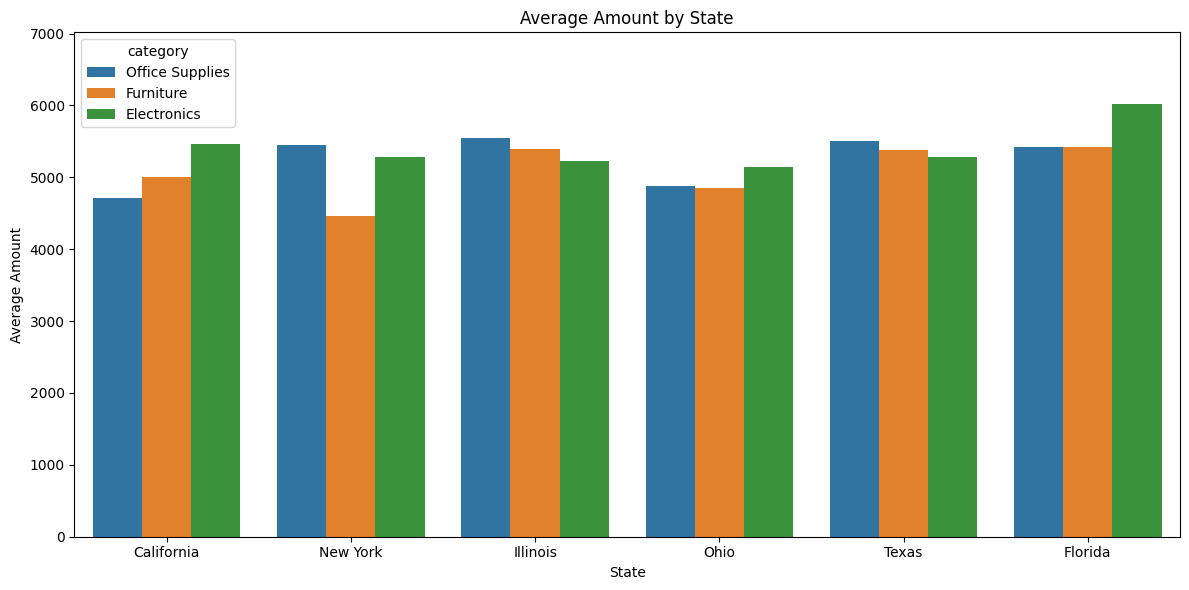

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
grouped_df = payment_avg.groupBy("State","category").avg("Average_Amt").toPandas()
grouped_df.rename(columns={"avg(Average_Amt)": "Average_Amt"}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x="State", y="Average_Amt",hue="category")
plt.title("Average Amount by State")
plt.ylabel("Average Amount")
plt.xlabel("State")
plt.ylim(0, grouped_df["Average_Amt"].max() + 1000)
plt.tight_layout()
plt.show()